In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# from categorical_encoders import OneHotCategoricalEncoder

In [5]:
data = pd.read_csv('/Users/mattmastin/Desktop/titanic.csv',
                  usecols=['sex', 'embarked', 'cabin', 'survived'])

In [6]:
data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [7]:
data['cabin'] = data['cabin'].str[0]
data.head()

,survived,sex,cabin,embarked
0,1,female,B,S
1,1,male,C,S
2,0,female,C,S
3,0,male,C,S
4,0,female,C,S


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'cabin']],
    data['survived'],
    test_size=0.3, 
    random_state=0)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [9]:
X_train['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
X_train['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
X_train['cabin'].unique()

array([nan, 'E', 'C', 'D', 'B', 'A', 'F', 'T', 'G'], dtype=object)

In [12]:
tmp = pd.get_dummies(X_train['sex'])
tmp.head()

,female,male
501,1,0
588,1,0
402,1,0
1193,0,1
686,1,0


In [13]:
pd.concat([X_train['sex'],
          pd.get_dummies(X_train['sex'])], axis=1).head()

,sex,female,male
501,female,1,0
588,female,1,0
402,female,1,0
1193,male,0,1
686,female,1,0


In [14]:
tmp = pd.get_dummies(X_train['embarked'])
tmp.head()

,C,Q,S
501,0,0,1
588,0,0,1
402,1,0,0
1193,0,1,0
686,0,1,0


In [15]:
tmp = pd.get_dummies(X_train)
print(tmp.shape)
tmp.head()

(916, 13)


,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T
501,1,0,0,0,1,0,0,0,0,0,0,0,0
588,1,0,0,0,1,0,0,0,0,0,0,0,0
402,1,0,1,0,0,0,0,0,0,0,0,0,0
1193,0,1,0,1,0,0,0,0,0,0,0,0,0
686,1,0,0,1,0,0,0,0,0,0,0,0,0


In [16]:
pd.get_dummies(X_train['embarked'], drop_first=True, dummy_na=True).head()

,Q,S,NaN
501,0,1,0
588,0,1,0
402,0,0,0
1193,1,0,0
686,1,0,0


In [18]:
encoder = OneHotEncoder(categories='auto',
                        drop='first', 
                        sparse=False,
                       handle_unknown='error')

encoder.fit(X_train.fillna('Missing'))

OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [19]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Missing', 'Q', 'S'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype=object)]

In [20]:
tmp = encoder.transform(X_train.fillna('Missing'))
pd.DataFrame(tmp).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
tmp = encoder.transform(X_test.fillna('Missing'))
pd.DataFrame(tmp).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
data = pd.read_csv(
    '/Users/mattmastin/Desktop/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [24]:
for col in data.columns:
    print(col, ':', len(data[col].unique()), 'labels')

Neighborhood : 25 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
SalePrice : 663 labels


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [26]:
pd.get_dummies(X_train, drop_first=True).shape

(1022, 53)

In [28]:
X_train['Neighborhood'].value_counts().sort_values(ascending=False).head(10)

NAmes      151
CollgCr    105
OldTown     73
Edwards     71
Sawyer      61
Somerst     56
Gilbert     55
NWAmes      51
NridgHt     51
SawyerW     45
Name: Neighborhood, dtype: int64

In [29]:
top_10 = [
    x for x in X_train['Neighborhood'].value_counts().sort_values(
    ascending=False).head(10).index
]

In [30]:
top_10

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Sawyer',
 'Somerst',
 'Gilbert',
 'NWAmes',
 'NridgHt',
 'SawyerW']

In [33]:
import numpy as np

for label in top_10:
    X_train['Neighborhood' + '_' + label] = np.where(
        X_train['Neighborhood'] == label, 1, 0)
    
    X_test['Neighborhood' + '_' + label] = np.where(
        X_test['Neighborhood'] == label, 1, 0)
    
X_train[['Neighborhood'] + ['Neighborhood' + '_' + c for c in top_10]].head(10)

,Neighborhood,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_SawyerW
64,CollgCr,0,1,0,0,0,0,0,0,0,0
682,ClearCr,0,0,0,0,0,0,0,0,0,0
960,BrkSide,0,0,0,0,0,0,0,0,0,0
1384,Edwards,0,0,0,1,0,0,0,0,0,0
1100,SWISU,0,0,0,0,0,0,0,0,0,0
416,Sawyer,0,0,0,0,1,0,0,0,0,0
1034,Crawfor,0,0,0,0,0,0,0,0,0,0
853,NAmes,1,0,0,0,0,0,0,0,0,0
472,Edwards,0,0,0,1,0,0,0,0,0,0
1011,Edwards,0,0,0,1,0,0,0,0,0,0


In [36]:
def calculate_top_categories(df, variable, how_many=10):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

def one_hot_encode(train, test, variable, top_x_labels):
    
    for label in top_x_labels:
        train[variable + '_' + label] = np.where(
            train[variable] == label, 1, 0)
        
        test[variable + '_' + label] = np.where(
            test[variable] == label, 1, 0)

In [37]:
for variable in ['Exterior1st', 'Exterior2nd']:
    top_categories = calculate_top_categories(X_train, variable, how_many=10)
    one_hot_encode(X_train, X_test, variable, top_categories)

In [38]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,CollgCr,VinylSd,VinylSd,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
682,ClearCr,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
960,BrkSide,Wd Sdng,Plywood,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1384,Edwards,WdShing,Wd Shng,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1100,SWISU,Wd Sdng,Wd Sdng,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']], # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [42]:
ordinal_mapping = {
    k: 1
    for i, k in enumerate(X_train['Neighborhood'].unique(), 0)
}

ordinal_mapping

{'CollgCr': 1,
 'ClearCr': 1,
 'BrkSide': 1,
 'Edwards': 1,
 'SWISU': 1,
 'Sawyer': 1,
 'Crawfor': 1,
 'NAmes': 1,
 'Mitchel': 1,
 'Timber': 1,
 'Gilbert': 1,
 'Somerst': 1,
 'MeadowV': 1,
 'OldTown': 1,
 'BrDale': 1,
 'NWAmes': 1,
 'NridgHt': 1,
 'SawyerW': 1,
 'NoRidge': 1,
 'IDOTRR': 1,
 'NPkVill': 1,
 'StoneBr': 1,
 'Blmngtn': 1,
 'Veenker': 1,
 'Blueste': 1}

In [43]:
X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)
X_test['Neighborhood'] = X_test['Neighborhood'].map(ordinal_mapping)

In [44]:
X_train['Neighborhood'].head(10)

64      1
682     1
960     1
1384    1
1100    1
416     1
1034    1
853     1
472     1
1011    1
Name: Neighborhood, dtype: int64

In [45]:
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].unique(), 0)}

def integer_encode(train, test, variable, ordinal_mapping):
    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [46]:
for variable in ['Exterior1st', 'Exterior2nd']:
    mappings = find_category_mappings(X_train, variable)
    integer_encode(X_train, X_test, variable, mappings)

In [47]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,1,0,0
682,1,1,1
960,1,1,2
1384,1,2,3
1100,1,1,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [51]:
le = LabelEncoder
le.fit(X_train['Neighborhood'])

TypeError: fit() missing 1 required positional argument: 'y'

In [52]:
data = pd.read_csv('/Users/mattmastin/Desktop/titanic.csv',
                  usecols=['cabin', 'sex', 'embarked', 'survived'])
data.head()

,survived,sex,cabin,embarked
0,1,female,B5,S
1,1,male,C22,S
2,0,female,C22,S
3,0,male,C22,S
4,0,female,C22,S


In [53]:
data.dropna(subset=['embarked'], inplace=True)
data.shape

(1307, 4)

In [54]:
data['cabin'] = data['cabin'].astype(str).str[0]

data = data[data['cabin'] != 'T']
data.shape

(1306, 4)

In [56]:
for col in data.columns:
    print(f'{col} : {len(data[col].unique())} labels')

survived : 2 labels
sex : 2 labels
cabin : 8 labels
embarked : 3 labels


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],
    data['survived'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((914, 4), (392, 4))

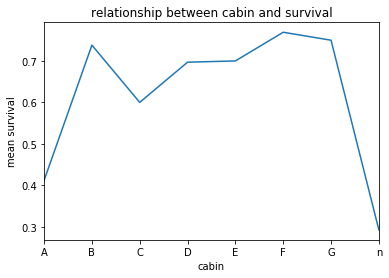

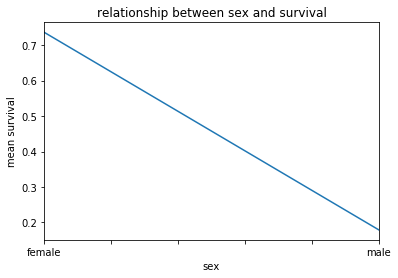

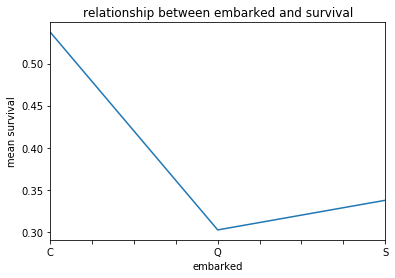

In [59]:
import matplotlib.pyplot as plt

for var in ['cabin', 'sex', 'embarked']:
    fig = plt.figure()
    fig = X_train.groupby([var])['survived'].mean().plot()
    fig.set_title(f'relationship between {var} and survival')
    fig.set_ylabel('mean survival')
    plt.show()

In [60]:
prob_df = X_train.groupby(['cabin'])['survived'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,survived
cabin,
A,0.411765
B,0.738095
C,0.600000
D,0.696970
E,0.700000
F,0.769231
G,0.750000
n,0.292199


In [61]:
prob_df['died'] = 1 - prob_df['survived']
prob_df

,survived,died
cabin,,
A,0.411765,0.588235
B,0.738095,0.261905
C,0.600000,0.400000
D,0.696970,0.303030
E,0.700000,0.300000
F,0.769231,0.230769
G,0.750000,0.250000
n,0.292199,0.707801


In [62]:
prob_df['ratio'] = prob_df['survived'] / prob_df['died']
prob_df

,survived,died,ratio
cabin,,,
A,0.411765,0.588235,0.700000
B,0.738095,0.261905,2.818182
C,0.600000,0.400000,1.500000
D,0.696970,0.303030,2.300000
E,0.700000,0.300000,2.333333
F,0.769231,0.230769,3.333333
G,0.750000,0.250000,3.000000
n,0.292199,0.707801,0.412826


In [63]:
ordered_labels = prob_df['ratio'].to_dict()
ordered_labels

{'A': 0.7,
 'B': 2.818181818181819,
 'C': 1.4999999999999998,
 'D': 2.3000000000000007,
 'E': 2.333333333333333,
 'F': 3.333333333333334,
 'G': 3.0,
 'n': 0.4128256513026052}

In [64]:
X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [65]:
X_train['cabin'].head(10)

843     0.412826
869     0.412826
430     0.412826
481     0.412826
1308    0.412826
456     0.412826
118     2.300000
485     2.300000
297     0.412826
263     2.333333
Name: cabin, dtype: float64

In [66]:
def find_category_mappings(df, variable, target):
    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    tmp['non-target'] = 1 - tmp[target]
    tmp['ratio'] = tmp[target] / tmp['non-target']
    return tmp['ratio'].to_dict()

def integer_encode(train, test, variable, ordinal_mapping):
    X_train[variable] = X_train[variable].map(ordinal_mapping)
    X_test[variable] = X_test[variable].map(ordinal_mapping)

In [67]:
for variable in ['sex', 'embarked']:
    mappings = find_category_mappings(X_train, variable, 'survived')
    integer_encode(X_train, X_test, variable, mappings)

In [68]:
X_train.head()

,cabin,sex,embarked,survived
843,0.412826,0.218107,0.509434,0
869,0.412826,0.218107,0.509434,0
430,0.412826,2.788235,0.509434,1
481,0.412826,2.788235,1.160920,1
1308,0.412826,0.218107,0.509434,0


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [71]:
cols = ['pclass', 'age', 'sibsp', 'parch', 'fare',
        'sex', 'cabin', 'embarked', 'survived']

data = pd.read_csv('/Users/mattmastin/Desktop/titanic.csv', usecols=cols)

data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B5,S
1,1,1,male,0.9167,1,2,151.5500,C22,S
2,1,0,female,2.0000,1,2,151.5500,C22,S
3,1,0,male,30.0000,1,2,151.5500,C22,S
4,1,0,female,25.0000,1,2,151.5500,C22,S


In [72]:
data.isnull().sum()

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
fare           1
cabin       1014
embarked       2
dtype: int64

In [73]:
data.dropna(subset=['fare', 'embarked'], inplace=True)

In [74]:
data['cabin'] = data['cabin'].astype(str).str[0]
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.0000,0,0,211.3375,B,S
1,1,1,male,0.9167,1,2,151.5500,C,S
2,1,0,female,2.0000,1,2,151.5500,C,S
3,1,0,male,30.0000,1,2,151.5500,C,S
4,1,0,female,25.0000,1,2,151.5500,C,S


In [75]:
data = data[data['cabin'] != 'T']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='survived', axis=1),
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((913, 8), (392, 8))

In [78]:
def impute_na(df, variable, value):
    df[variable].fillna(value, inplace=True)
    
impute_na(X_test, 'age', X_train['age'].mean())
impute_na(X_train, 'age', X_train['age'].mean())

In [79]:
X_train.isnull().sum(), X_test.isnull().sum()

(pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 cabin       0
 embarked    0
 dtype: int64, pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        0
 cabin       0
 embarked    0
 dtype: int64)

In [81]:
def get_OHE(df):
    df_OHE = pd.concat(
    [df[['pclass', 'age', 'sibsp', 'parch', 'fare']],
    pd.get_dummies(df[['sex', 'cabin', 'embarked']],
                  drop_first=True)], axis=1)
    
    return df_OHE

X_train_OHE = get_OHE(X_train)
X_test_OHE = get_OHE(X_test)

X_train_OHE.head()

,pclass,age,sibsp,parch,fare,sex_male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_n,embarked_Q,embarked_S
402,2,30.00000,1,0,13.8583,0,0,0,0,0,0,0,1,0,0
698,3,18.00000,0,0,8.6625,1,0,0,0,0,0,0,1,0,1
1291,3,29.79847,0,0,8.7125,1,0,0,0,0,0,0,1,0,1
1229,3,27.00000,0,0,8.6625,1,0,0,0,0,0,0,1,0,1
118,1,29.79847,0,0,26.5500,1,0,0,1,0,0,0,0,0,1


In [82]:
def categorical_to_counts(df_train, df_test):
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['sex', 'cabin', 'embarked']:
        counts_map = df_train_temp[col].value_counts().to_dict()
        
        df_train_temp[col] = df_train_temp[col].map(counts_map)
        df_test_temp[col] = df_test_temp[col].map(counts_map)
        
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
402,2,326,30.00000,1,0,13.8583,702,184
698,3,587,18.00000,0,0,8.6625,702,647
1291,3,587,29.79847,0,0,8.7125,702,647
1229,3,587,27.00000,0,0,8.6625,702,647
118,1,587,29.79847,0,0,26.5500,33,647


In [83]:
def categories_to_ordered(df_train, df_test, y_train, y_test):
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['sex', 'cabin', 'embarked']:
        ordered_labels = df_train_temp.groupby(
            [col])['survived'].mean().sort_values().index
        
        ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
        
        df_train_temp[col] = df_train[col].map(ordinal_label)
        df_test_temp[col] = df_test[col].map(ordinal_label)
        
    df_train_temp.drop(['survived'], axis=1, inplace=True)
    df_test_temp.drop(['survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_ordered, X_test_ordered = categories_to_ordered(
    X_train, X_test, y_train, y_test)

X_train_ordered.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
402,2,1,30.00000,1,0,13.8583,0,2
698,3,0,18.00000,0,0,8.6625,0,0
1291,3,0,29.79847,0,0,8.7125,0,0
1229,3,0,27.00000,0,0,8.6625,0,0
118,1,0,29.79847,0,0,26.5500,5,0


In [85]:
def categories_to_mean(df_train, df_test, y_train, y_test):
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['sex', 'cabin', 'embarked']:
        ordered_labels = df_train_temp.groupby(
            [col])['survived'].mean().to_dict()
        
        df_train_temp[col] = df_train[col].map(ordered_labels)
        df_test_temp[col] = df_test[col].map(ordered_labels)
        
    df_train_temp.drop(['survived'], axis=1, inplace=True)
    df_test_temp.drop(['survived'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_mean, X_test_mean = categories_to_mean(
    X_train, X_test, y_train, y_test)

X_train_mean.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
402,2,0.730061,30.00000,1,0,13.8583,0.292023,0.516304
698,3,0.173765,18.00000,0,0,8.6625,0.292023,0.332303
1291,3,0.173765,29.79847,0,0,8.7125,0.292023,0.332303
1229,3,0.173765,27.00000,0,0,8.6625,0.292023,0.332303
118,1,0.173765,29.79847,0,0,26.5500,0.696970,0.332303


In [86]:
def run_randomforests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)
    
    print('train set')
    pred = rf.predict_proba(X_train)
    print(f'random forests roc auc {roc_auc_score(y_train, pred[:, 1])}')
    
    print('test set')
    pred = rf.predict_proba(X_test)
    print(f'random forests roc auc {roc_auc_score(y_test, pred[:, 1])}')

In [87]:
run_randomforests(X_train_OHE, X_test_OHE, y_train, y_test)

train set
random forests roc auc 0.8488938507340109
test set
random forests roc auc 0.8072730715135779


In [88]:
run_randomforests(X_train_count, X_test_count, y_train, y_test)

train set
random forests roc auc 0.8654552920644698
test set
random forests roc auc 0.8194309206967434


In [89]:
run_randomforests(X_train_ordered, X_test_ordered, y_train, y_test)

train set
random forests roc auc 0.8669027820552304
test set
random forests roc auc 0.8219733852645245


In [90]:
run_randomforests(X_train_mean, X_test_mean, y_train, y_test)

train set
random forests roc auc 0.867010573863053
test set
random forests roc auc 0.8207562479714378


In [91]:
def run_logistic(X_train, X_test, y_train, y_test):
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)
    
    print('train set')
    pred = logit.predict_proba(X_train)
    print(f'random forests roc auc {roc_auc_score(y_train, pred[:, 1])}')
    
    print('test set')
    pred = logit.predict_proba(X_test)
    print(f'random forests roc auc {roc_auc_score(y_test, pred[:, 1])}')

In [92]:
run_logistic(X_train_OHE, X_test_OHE, y_train, y_test)

train set
random forests roc auc 0.8287932450467097
test set
random forests roc auc 0.8013902412636589


In [93]:
run_logistic(X_train_count, X_test_count, y_train, y_test)

train set
random forests roc auc 0.7886433631044041
test set
random forests roc auc 0.7356648274369794


/Users/mattmastin/.pyenv/versions/3.8.1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
pd.set_option('display.max_columns', None)

In [95]:
data = pd.read_csv('/Users/mattmastin/Desktop/houseprice.csv')

In [97]:
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data.SalePrice,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [101]:
for col in X_train.columns:
    if X_train[col].dtypes == 'O': # if variable is categorical
        if X_train[col].nunique() < 3: # if variable has less than three categories
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()
        

Street
Grvl    0.004892
Pave    0.995108
Name: Street, dtype: float64

Alley
Grvl    0.029354
Pave    0.031311
Name: Alley, dtype: float64

Utilities
AllPub    0.999022
NoSeWa    0.000978
Name: Utilities, dtype: float64

CentralAir
N    0.068493
Y    0.931507
Name: CentralAir, dtype: float64

PoolQC
Ex    0.000978
Gd    0.001957
Name: PoolQC, dtype: float64



In [102]:
cols = ['MasVnrType', 'ExterQual', 'BsmtCond']

for col in cols:
    print(X_train.groupby(col)[col].count() / len(X_train))
    print()

MasVnrType
BrkCmn     0.009785
BrkFace    0.294521
None       0.595890
Stone      0.094912
Name: MasVnrType, dtype: float64

ExterQual
Ex    0.029354
Fa    0.011742
Gd    0.332681
TA    0.626223
Name: ExterQual, dtype: float64

BsmtCond
Fa    0.032290
Gd    0.045010
Po    0.001957
TA    0.897260
Name: BsmtCond, dtype: float64



In [104]:
multi_cat_cols = []

for col in X_train.columns:
    if X_train[col].dtypes == 'O':
        if X_train[col].nunique() > 10:
            multi_cat_cols.append(col)
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()
    

Neighborhood
Blmngtn    0.011742
Blueste    0.001957
BrDale     0.009785
BrkSide    0.040117
ClearCr    0.023483
CollgCr    0.102740
Crawfor    0.034247
Edwards    0.069472
Gilbert    0.053816
IDOTRR     0.023483
MeadowV    0.011742
Mitchel    0.035225
NAmes      0.147750
NPkVill    0.006849
NWAmes     0.049902
NoRidge    0.029354
NridgHt    0.049902
OldTown    0.071429
SWISU      0.017613
Sawyer     0.059687
SawyerW    0.044031
Somerst    0.054795
StoneBr    0.015656
Timber     0.029354
Veenker    0.005871
Name: Neighborhood, dtype: float64

Exterior1st
AsbShng    0.014677
AsphShn    0.000978
BrkComm    0.000978
BrkFace    0.034247
CBlock     0.000978
CemntBd    0.038160
HdBoard    0.149706
ImStucc    0.000978
MetalSd    0.135029
Plywood    0.084149
Stone      0.001957
Stucco     0.016634
VinylSd    0.356164
Wd Sdng    0.144814
WdShing    0.020548
Name: Exterior1st, dtype: float64

Exterior2nd
AsbShng    0.016634
AsphShn    0.000978
Brk Cmn    0.003914
BrkFace    0.017613
CBlock     0

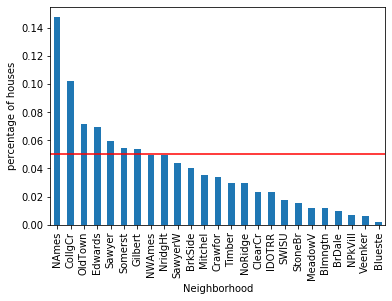

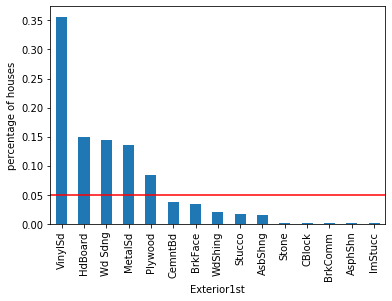

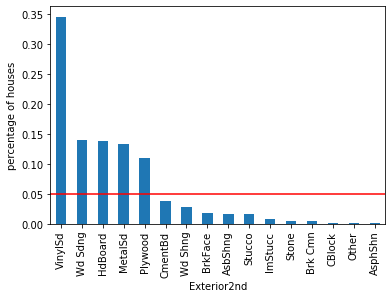

In [107]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y=0.05, color = 'red')
    fig.set_ylabel('percentage of houses')
    plt.show()

In [108]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    return non_rare

In [112]:
find_non_rare_labels(X_train, 'Neighborhood', 0.05)

['CollgCr', 'Edwards', 'Gilbert', 'NAmes', 'OldTown', 'Sawyer', 'Somerst']

In [113]:
[ x for x in X_train['Neighborhood'].unique(
    ) if x not in find_non_rare_labels(X_train, 'Neighborhood', 0.05)]

['ClearCr',
 'BrkSide',
 'SWISU',
 'Crawfor',
 'Mitchel',
 'Timber',
 'MeadowV',
 'BrDale',
 'NWAmes',
 'NridgHt',
 'SawyerW',
 'NoRidge',
 'IDOTRR',
 'NPkVill',
 'StoneBr',
 'Blmngtn',
 'Veenker',
 'Blueste']

In [114]:
def rare_encoding(X_train, X_test, variable, tolerance):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)
    
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable]= np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')
    
    return X_train, X_test

In [115]:
for variable in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

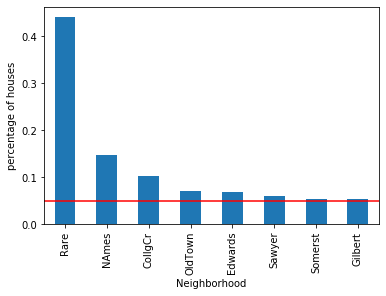

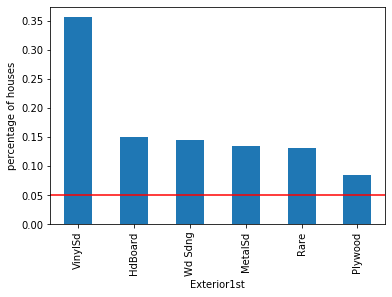

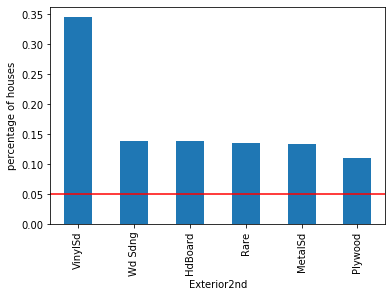

In [116]:
for col in ['Neighborhood', 'Exterior1st', 'Exterior2nd']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('percentage of houses')
    plt.show()

In [117]:
for variable in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

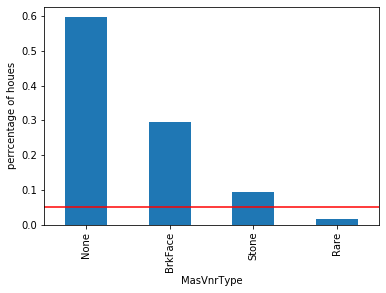

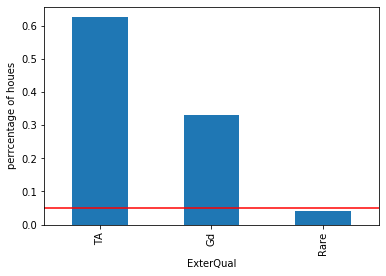

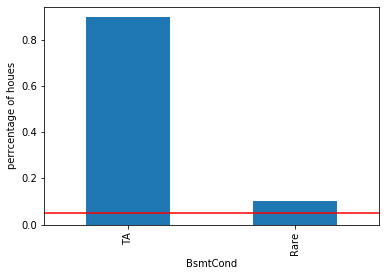

In [120]:
for col in ['MasVnrType', 'ExterQual', 'BsmtCond']:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('perrcentage of houes')
    plt.show()